In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1

In [4]:
List1 = ['Good Morning', 'Good Evening', 'Hello', 'Good afternoon', 'Greetings',
'Good Morning', 'Nice to see you']

a) Use list comprehension to store unique strings with multi-words of ‘List1’
to another list named ‘Newlist’. Also, write an anonymous function to sort
the given list ‘List1’ on the last character of each string.

In [5]:
Newlist=[]
Newlist=[x for x in List1 if ' ' in x and x  not in Newlist]


In [6]:
Newlist

['Good Morning',
 'Good Evening',
 'Good afternoon',
 'Good Morning',
 'Nice to see you']

In [7]:
List1.sort(key=lambda x:x[-1])
List1

['Good Morning',
 'Good Evening',
 'Good Morning',
 'Good afternoon',
 'Hello',
 'Greetings',
 'Nice to see you']

b) Using ‘List1’, generate the following dictionary ‘Anydict’ where key is the
count of words in a string and value is the list of strings having that count.
Anydict={1:[ 'Greetings','Hello'], 2: ['Good Morning', ' Good Evening',
'Good afternoon', 'Good Morning'], 4: ['Nice to see you']}.
Create a data series ‘Ds1’ using the created dictionary ‘Anydict’.

In [8]:
Anydict={}
for x in List1:
    try:
        Anydict[x.count(" ")+1].append(x)
    except:
        Anydict[x.count(" ")+1]=[]
        Anydict[x.count(" ")+1].append(x)
Anydict

{2: ['Good Morning', 'Good Evening', 'Good Morning', 'Good afternoon'],
 1: ['Hello', 'Greetings'],
 4: ['Nice to see you']}

In [9]:
Ds1=pd.Series(Anydict)

In [10]:
Ds1

2    [Good Morning, Good Evening, Good Morning, Goo...
1                                   [Hello, Greetings]
4                                    [Nice to see you]
dtype: object

c) Draw a bar plot to compare the frequency of strings with equal word
counts in ‘List1’. For example, the frequency of strings with two words in
the given list ‘List1’ is 4. Give proper names to both axes

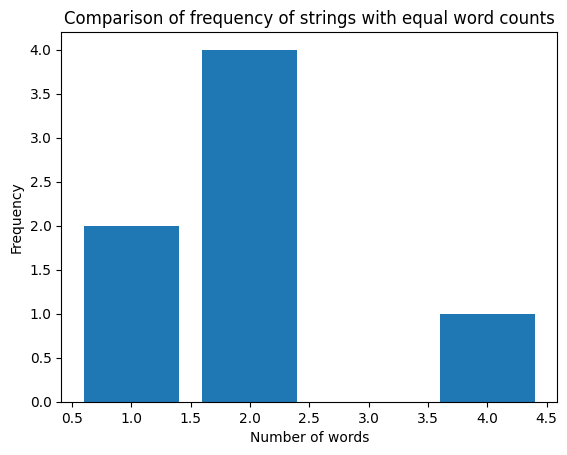

In [11]:
plt.bar(Anydict.keys(),[len(x)for x in Anydict.values()])
plt.title("Comparison of frequency of strings with equal word counts")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

# Q2

In [12]:
Ex={'ID':np.arange(15),
          'Name':['A','A','A','B','B','B','C','C','C','D','D','D','E','E','E'],
         'Diet':['low fat','low fat','no fat','no fat','no fat','low fat','low fat','low fat','low fat'
                 ,'low fat','low fat','low fat','no fat','low fat','low fat'],
          'Pulse':[85,85,88,90,92,93,97,97,94,80,82,83,91,92,91],
          'Time(min)':[40,45,30,10,15,30,15,15,30,10,15,30,10,15,30],
          'Kind':['walking','walking','running','walking','rest','rest','rest','rest','walking','walking','rest','rest','rest',
                 'running','running']
         }
Exercise=pd.DataFrame(Ex)
Exercise

,ID,Name,Diet,Pulse,Time(min),Kind
0,0,A,low fat,85,40,walking
1,1,A,low fat,85,45,walking
2,2,A,no fat,88,30,running
3,3,B,no fat,90,10,walking
4,4,B,no fat,92,15,rest
5,5,B,low fat,93,30,rest
6,6,C,low fat,97,15,rest
7,7,C,low fat,97,15,rest
8,8,C,low fat,94,30,walking
9,9,D,low fat,80,10,walking


a) Create a new DataFrame SELECTED having a hierarchical index on
columns “Name” and “Diet”. Then, find the maximum pulse rate for each
individual in the SELECTED DataFrame.

In [13]:
Selected=Exercise.set_index(['Name','Diet'])
SelectedEx={'ID':np.arange(15),
          'Name':['A','A','A','B','B','B','C','C','C','D','D','D','E','E','E'],
         'Diet':['low fat','low fat','no fat','no fat','no fat','low fat','low fat','low fat','low fat'
                 ,'low fat','low fat','low fat','no fat','low fat','low fat'],
          'Pulse':[85,85,88,90,92,93,97,97,94,80,82,83,91,92,91],
          'Time(min)':[40,45,30,10,15,30,15,15,30,10,15,30,10,15,30],
          'Kind':['walking','walking','running','walking','rest','rest','rest','rest','walking','walking','rest','rest','rest',
                 'running','running']
         }
Exercise=pd.DataFrame(Ex)
Exercise

,ID,Name,Diet,Pulse,Time(min),Kind
0,0,A,low fat,85,40,walking
1,1,A,low fat,85,45,walking
2,2,A,no fat,88,30,running
3,3,B,no fat,90,10,walking
4,4,B,no fat,92,15,rest
5,5,B,low fat,93,30,rest
6,6,C,low fat,97,15,rest
7,7,C,low fat,97,15,rest
8,8,C,low fat,94,30,walking
9,9,D,low fat,80,10,walking


In [14]:

Selected['Pulse'].groupby(level=0).apply(max)

Name
A    88
B    93
C    97
D    83
E    92
Name: Pulse, dtype: int64

b) Count the total number of records of individuals having names ‘A’ or ‘B’
and who are following a low fat diet plan from the data frame SELECTED
created in part (a). Also, sort DataFrame SELECTED on index at first
level in descending order.


In [15]:
Selected.groupby(level=[0,1]).size().loc["A":"B",'low fat']

Name  Diet   
A     low fat    2
B     low fat    1
dtype: int64

In [16]:
Selected.sort_index(level=0,ascending=False)

ID  Pulse  Time(min)     Kind
Name Diet                                  
E    no fat   12     91         10     rest
     low fat  14     91         30  running
     low fat  13     92         15  running
D    low fat  11     83         30     rest
     low fat  10     82         15     rest
     low fat   9     80         10  walking
C    low fat   8     94         30  walking
     low fat   7     97         15     rest
     low fat   6     97         15     rest
B    no fat    4     92         15     rest
     no fat    3     90         10  walking
     low fat   5     93         30     rest
A    no fat    2     88         30  running
     low fat   1     85         45  walking
     low fat   0     85         40  walking

c) Using DataFrame EXERCISE, create a figure with two subplots and save
the figure with the name ‘exerciseplot.jpeg’. Set title of the figure as
‘EXERCISE’. First subplot compares the average pulse rate of individuals
and the second subplot shows the relationship between variables ‘Pulse’
and ‘Time’. Do color encoding using variable ‘kind’ in the scatter plot.


<function matplotlib.pyplot.show(close=None, block=None)>

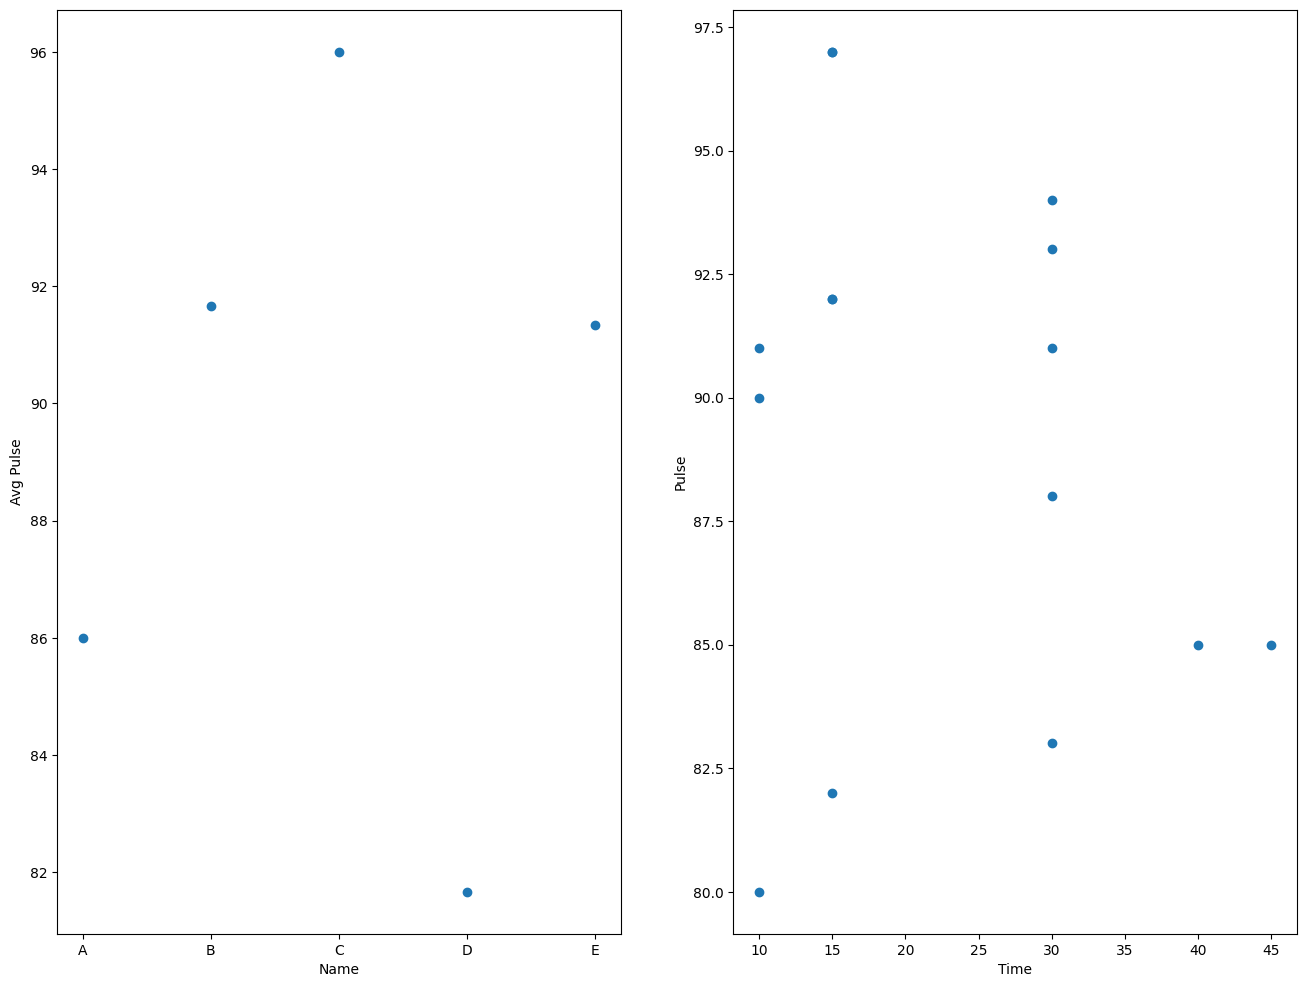

In [17]:
plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
s=Exercise.set_index(["Name"])['Pulse'].groupby(level=0).apply(np.mean)
plt.scatter(s.index,s)
plt.xlabel("Name")
plt.ylabel("Avg Pulse")
plt.show
plt.subplot(1,2,2)
plt.scatter(Exercise['Time(min)'],Exercise['Pulse'])
plt.xlabel("Time")
plt.ylabel("Pulse")
plt.show

# Q3

a) Given the following commands to create series sr
import numpy as np
import pandas as pd
sr = pd.Series([‘Madhuri’,’AjaySh@rma’, ‘R@ni’, ‘Radha’,np.nan,’Smita’,’3567’])
Write separate commands to compute the length of each string in the
series, replace @ with ‘a’ in all strings in the series, count the
occurrences of ‘a’ in each string, change the case of all letters, find all
strings with pattern ‘adh’ in them and find all strings that end with
letter ‘i’.

In [18]:
sr = pd.Series(['Madhuri','AjaySh@rma', 'R@ni', 'Radha',np.nan,'Smita','3567'])

In [19]:
sr.str.len()

0     7.0
1    10.0
2     4.0
3     5.0
4     NaN
5     5.0
6     4.0
dtype: float64

In [20]:
sr=sr.str.replace('@','a')
sr

0       Madhuri
1    AjaySharma
2          Rani
3         Radha
4           NaN
5         Smita
6          3567
dtype: object

In [21]:
sr.str.count("a")

0    1.0
1    3.0
2    1.0
3    2.0
4    NaN
5    1.0
6    0.0
dtype: float64

In [22]:
sr[sr.str.endswith('i',na=False)]

0    Madhuri
2       Rani
dtype: object

In [23]:
sr[sr.str.contains('adh',na=False)]

0    Madhuri
3      Radha
dtype: object

In [24]:
sr.str.swapcase()

0       mADHURI
1    aJAYsHARMA
2          rANI
3         rADHA
4           NaN
5         sMITA
6          3567
dtype: object

b) Create a DataFrame of 7 rows and 7 columns containing random
integers in the range of 1 to 100. Compute the correlation of each row
with the preceding row.

In [25]:
df=pd.DataFrame(np.random.randint(1,100,size=(7,7)))
df

,0,1,2,3,4,5,6
0,2,89,18,53,74,62,5
1,90,4,65,29,61,1,12
2,85,88,66,23,73,37,32
3,88,31,30,90,8,15,16
4,22,9,35,49,82,41,66
5,12,23,95,34,76,17,82
6,5,64,1,11,97,34,55


In [26]:
##correlation of each row with the preceding row.
df.apply(lambda x:x.corr(df.iloc[x.index-1]),axis=1)

0    1.000000
1   -0.476542
2    0.139565
3   -0.301646
4   -0.028094
5   -0.276008
6    0.577383
dtype: float64

c) Write Numpy code to generate a random list of 100 integers (range of
55 to 150) and identify the index of the largest element and smallest
element. Change this list into a 10 x 10 matrix and replace all diagonal
elements with 1.

In [27]:
l=np.random.randint(55,150,100)
l

array([124, 127,  91, 103, 137, 104,  66,  85, 100, 141,  81, 121, 138,
        71, 116,  87, 130,  78,  84,  55,  86,  91, 116,  80,  73, 138,
       102,  87, 144,  61, 141, 111, 100,  60,  64,  91, 127, 120, 127,
        70,  87,  73,  84, 138, 132, 116,  56, 134, 148, 129,  89,  79,
        92, 145,  92, 105, 140, 146, 102,  99, 113,  74,  68, 149, 123,
       131, 139,  86,  83, 119, 129, 127,  66,  93,  92,  87,  77, 106,
       128, 127, 136, 139,  66, 149,  59, 110, 111, 134,  88, 106, 131,
       131, 104, 138, 137, 142,  97, 104, 116,  61])

In [28]:
l.argmax()

63

In [29]:
l.argmin()

19

In [30]:
l=l.reshape(10,10)
l

array([[124, 127,  91, 103, 137, 104,  66,  85, 100, 141],
       [ 81, 121, 138,  71, 116,  87, 130,  78,  84,  55],
       [ 86,  91, 116,  80,  73, 138, 102,  87, 144,  61],
       [141, 111, 100,  60,  64,  91, 127, 120, 127,  70],
       [ 87,  73,  84, 138, 132, 116,  56, 134, 148, 129],
       [ 89,  79,  92, 145,  92, 105, 140, 146, 102,  99],
       [113,  74,  68, 149, 123, 131, 139,  86,  83, 119],
       [129, 127,  66,  93,  92,  87,  77, 106, 128, 127],
       [136, 139,  66, 149,  59, 110, 111, 134,  88, 106],
       [131, 131, 104, 138, 137, 142,  97, 104, 116,  61]])

In [31]:
np.fill_diagonal(l,1)
l

array([[  1, 127,  91, 103, 137, 104,  66,  85, 100, 141],
       [ 81,   1, 138,  71, 116,  87, 130,  78,  84,  55],
       [ 86,  91,   1,  80,  73, 138, 102,  87, 144,  61],
       [141, 111, 100,   1,  64,  91, 127, 120, 127,  70],
       [ 87,  73,  84, 138,   1, 116,  56, 134, 148, 129],
       [ 89,  79,  92, 145,  92,   1, 140, 146, 102,  99],
       [113,  74,  68, 149, 123, 131,   1,  86,  83, 119],
       [129, 127,  66,  93,  92,  87,  77,   1, 128, 127],
       [136, 139,  66, 149,  59, 110, 111, 134,   1, 106],
       [131, 131, 104, 138, 137, 142,  97, 104, 116,   1]])

# Q4

Using the data frame EXERCISE provided in Q2 , attempt the following
questions

a) What is a map function? Use map function to convert all values in the
‘Diet’ attribute to uppercase.

In [32]:
Exercise['Diet'].map(lambda x:x.upper())

0     LOW FAT
1     LOW FAT
2      NO FAT
3      NO FAT
4      NO FAT
5     LOW FAT
6     LOW FAT
7     LOW FAT
8     LOW FAT
9     LOW FAT
10    LOW FAT
11    LOW FAT
12     NO FAT
13    LOW FAT
14    LOW FAT
Name: Diet, dtype: object

b) Assuming the data is stored in a csv file “Exercise.csv”, give appropriate
commands to read this file, indexed on ‘Name’ and ‘Diet’ into a dataframe
named EXERCISE. Modify this command to read only the first 5 rows of
the file. If the file contains millions of records then give the command to
read the file in small pieces of uniform size.

In [33]:
Exercise.to_csv("Exercise.csv",sep=' ')#created the csv file

In [34]:
EXERCISE=pd.read_csv("Exercise.csv",sep=' ',index_col=['Name','Diet'])
EXERCISE

Unnamed: 0  ID  Pulse  Time(min)     Kind
Name Diet                                              
A    low fat           0   0     85         40  walking
     low fat           1   1     85         45  walking
     no fat            2   2     88         30  running
B    no fat            3   3     90         10  walking
     no fat            4   4     92         15     rest
     low fat           5   5     93         30     rest
C    low fat           6   6     97         15     rest
     low fat           7   7     97         15     rest
     low fat           8   8     94         30  walking
D    low fat           9   9     80         10  walking
     low fat          10  10     82         15     rest
     low fat          11  11     83         30     rest
E    no fat           12  12     91         10     rest
     low fat          13  13     92         15  running
     low fat          14  14     91         30  running

In [35]:
EXERCISE=pd.read_csv("Exercise.csv",sep=' ',index_col=['Name','Diet'],nrows=5)
EXERCISE

Unnamed: 0  ID  Pulse  Time(min)     Kind
Name Diet                                              
A    low fat           0   0     85         40  walking
     low fat           1   1     85         45  walking
     no fat            2   2     88         30  running
B    no fat            3   3     90         10  walking
     no fat            4   4     92         15     rest

In [36]:
EXERCISE=pd.read_csv("Exercise.csv",sep=' ',index_col=['Name','Diet'],chunksize=100)

c) Differentiate between qcut and cut methods. Use the appropriate method to
create 4 bins on the ‘Pulse’ attribute. Store the corresponding bin value of
‘Pulse’ attribute as a new attribute ‘Pbin’ in the original DataFrame.
Display the count of values of each bin

In [37]:
Pbin=pd.qcut(Exercise['Pulse'],4)
Pbin

0     (79.999, 85.0]
1     (79.999, 85.0]
2       (85.0, 91.0]
3       (85.0, 91.0]
4       (91.0, 92.5]
5       (92.5, 97.0]
6       (92.5, 97.0]
7       (92.5, 97.0]
8       (92.5, 97.0]
9     (79.999, 85.0]
10    (79.999, 85.0]
11    (79.999, 85.0]
12      (85.0, 91.0]
13      (91.0, 92.5]
14      (85.0, 91.0]
Name: Pulse, dtype: category
Categories (4, interval[float64, right]): [(79.999, 85.0] < (85.0, 91.0] < (91.0, 92.5] < (92.5, 97.0]]

In [38]:
Exercise['Pbin']=Pbin
Exercise

,ID,Name,Diet,Pulse,Time(min),Kind,Pbin
0,0,A,low fat,85,40,walking,"(79.999, 85.0]"
1,1,A,low fat,85,45,walking,"(79.999, 85.0]"
2,2,A,no fat,88,30,running,"(85.0, 91.0]"
3,3,B,no fat,90,10,walking,"(85.0, 91.0]"
4,4,B,no fat,92,15,rest,"(91.0, 92.5]"
5,5,B,low fat,93,30,rest,"(92.5, 97.0]"
6,6,C,low fat,97,15,rest,"(92.5, 97.0]"
7,7,C,low fat,97,15,rest,"(92.5, 97.0]"
8,8,C,low fat,94,30,walking,"(92.5, 97.0]"
9,9,D,low fat,80,10,walking,"(79.999, 85.0]"


In [39]:
pd.value_counts(Pbin)

(79.999, 85.0]    5
(85.0, 91.0]      4
(92.5, 97.0]      4
(91.0, 92.5]      2
Name: Pulse, dtype: int64

# Q5

In [40]:
ADM=pd.read_csv('ADM.csv',sep=' ')
ADM

,Sid,Name,List,DateAdm,Marks(%),CourseCode,Gender
0,S1,Amit Jaiswal,I,01-07-2021,97.00,C001,Male
1,S2,Pradeep Dubey,II,09-07-2021,95.00,C009,Male
2,S3,Rinky Arora,I,04-07-2021,90.00,C112,Female
3,S4,Sonia Shah,IV,01-08-2021,96.00,C001,Female
4,S5,Sushil Negi,III,20-07-2021,96.50,C001,Male
5,S6,Neeraj Gaur,II,11-07-2021,94.50,C009,Male
6,S7,Preeti Sharma,IV,03-08-21,89.00,C112,Female
7,S8,Deep Gupta,III,23-07-2021,95.75,C001,Male
8,S9,Priya Bansal,II,10-7-2021,93.50,C009,Female
9,S10,Anand Ahuja,I,01-07-2021,88.50,C112,Male


a) Set the first column ‘Sid’ as the row index of the given DataFrame ADM.
Create a pivot table of the DataFrame to display the total number of
admissions as per ‘Course Code’ and ‘Gender’.

In [41]:
Adm=ADM.set_index(['Sid'])
Adm

,Name,List,DateAdm,Marks(%),CourseCode,Gender
Sid,,,,,,
S1,Amit Jaiswal,I,01-07-2021,97.00,C001,Male
S2,Pradeep Dubey,II,09-07-2021,95.00,C009,Male
S3,Rinky Arora,I,04-07-2021,90.00,C112,Female
S4,Sonia Shah,IV,01-08-2021,96.00,C001,Female
S5,Sushil Negi,III,20-07-2021,96.50,C001,Male
S6,Neeraj Gaur,II,11-07-2021,94.50,C009,Male
S7,Preeti Sharma,IV,03-08-21,89.00,C112,Female
S8,Deep Gupta,III,23-07-2021,95.75,C001,Male
S9,Priya Bansal,II,10-7-2021,93.50,C009,Female


In [45]:
Adm.pivot_table(index=['Course Code','Gender'],aggfunc='count')['Name']

KeyError: 'Course Code'

b) For each ‘List’, find the total number of admissions, minimum ‘Marks%’
and maximum ‘Marks%’ in each course.

In [ ]:
Adm.groupby('Course Code').max('Marks(%)')

,Marks(%)
Course Code,
C001,97.0
C009,95.0
C112,90.0


In [ ]:
Adm.groupby('Course Code').min('Marks(%)')

,Marks(%)
Course Code,
C001,95.75
C009,93.50
C112,88.50


In [ ]:
Adm.groupby('List').count()['Name']

List
I      3
II     3
III    2
IV     2
Name: Name, dtype: int64

c) Calculate and display the average ‘Marks%’ of all Female students of
course ‘C112’.

In [ ]:
C112=Adm[Adm['Course Code']=='C112']
C112[C112['Gender']=='Female']['Marks(%)'].mean()

89.5

# Q6

a) Give Pandas statements to create two data series of random floating-point
numbers where the first data series has a datetime index of all second
Tuesdays of every month of 2021 and the second data series has a datetime
index of 20 continuous dates ending at 31/01/2021.

In [ ]:
d1=pd.date_range('2021',periods=12,freq='WOM-2TUE')
pd.Series(np.random.randn(12),index=d1)

2021-01-12   -0.867357
2021-02-09   -0.215481
2021-03-09    0.312550
2021-04-13    0.912210
2021-05-11   -0.832939
2021-06-08    1.132506
2021-07-13   -0.137903
2021-08-10    0.831067
2021-09-14    0.404590
2021-10-12    1.881467
2021-11-09    1.512149
2021-12-14   -1.066883
Freq: WOM-2TUE, dtype: float64

In [ ]:
d2=pd.date_range(end='31/01/2021',periods=20)
pd.Series(np.random.randn(20),index=d2)

2021-01-12    0.222892
2021-01-13    1.310355
2021-01-14   -1.124509
2021-01-15   -2.808353
2021-01-16   -0.898294
2021-01-17   -0.618187
2021-01-18    0.104001
2021-01-19   -0.075086
2021-01-20   -0.255019
2021-01-21    0.612534
2021-01-22   -0.669064
2021-01-23   -0.356531
2021-01-24    0.088953
2021-01-25    1.309216
2021-01-26   -0.625258
2021-01-27    0.494077
2021-01-28   -1.010196
2021-01-29   -0.878719
2021-01-30   -0.657933
2021-01-31   -0.977015
Freq: D, dtype: float64

b) What is resampling? Write python code depicting the usage of resample
method

In [ ]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').count()

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
Freq: M, dtype: int64

c) Create a DataFrame DS with two columns ‘Dates’ and ‘Sale’ containing all
dates of January 2021 and 31 random integers between 500 and 1000
respectively. Add another column ‘Moving Avg’ to DS containing the
rolling average of 5 consecutive values in the ‘Sale’ column. Plot simple
line plots between ‘Dates’ and ‘Sale’ as well as ‘Dates’ and ‘Moving Avg’.
Explain the utility of the rolling method with respect to these plots

In [ ]:
dict1={'Dates':pd.date_range('2021',periods=31),'Sale':np.random.randint(500,1000,31)}
DS=pd.DataFrame(dict1)
DS

,Dates,Sale
0,2021-01-01,771
1,2021-01-02,770
2,2021-01-03,507
3,2021-01-04,817
4,2021-01-05,781
5,2021-01-06,665
6,2021-01-07,996
7,2021-01-08,731
8,2021-01-09,571
9,2021-01-10,713


In [ ]:
movingAvg=DS['Sale'].rolling(5,min_periods=1).sum()
DS['Moving Avg']=movingAvg
DS

,Dates,Sale,Moving Avg
0,2021-01-01,771,771.0
1,2021-01-02,770,1541.0
2,2021-01-03,507,2048.0
3,2021-01-04,817,2865.0
4,2021-01-05,781,3646.0
5,2021-01-06,665,3540.0
6,2021-01-07,996,3766.0
7,2021-01-08,731,3990.0
8,2021-01-09,571,3744.0
9,2021-01-10,713,3676.0


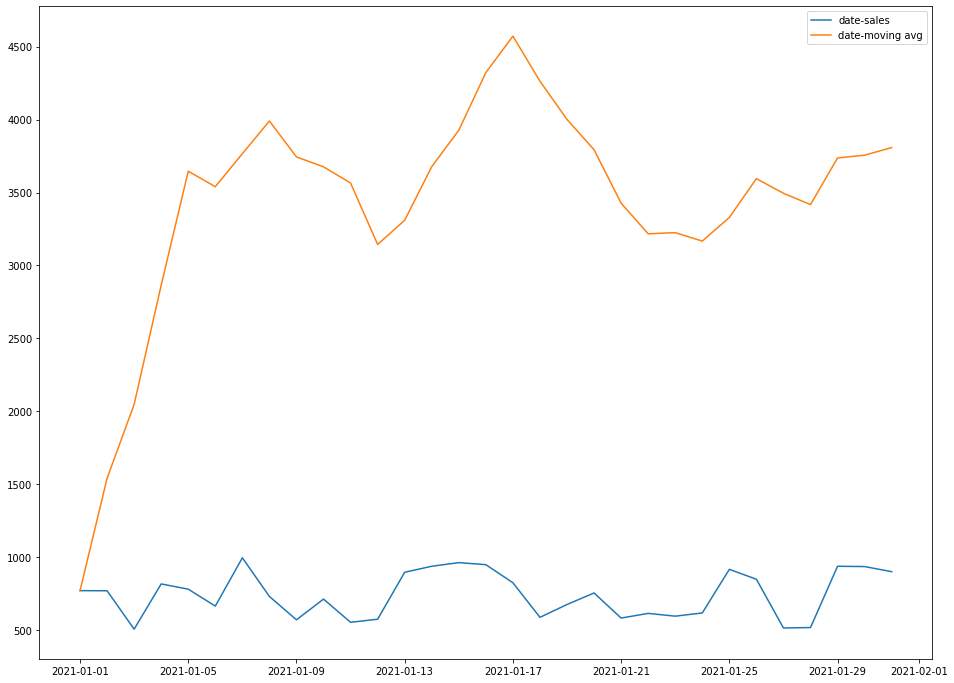

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(DS['Dates'],DS['Sale'],label='date-sales')
plt.plot(DS['Dates'],DS['Moving Avg'],label='date-moving avg')
plt.legend()
plt.show()